# Programation Fonctionnelle

Nous allons exploiter la puissance des fonctions offerte par les différentes librairies de Python. L'objectif est de ne pas refaire ce qui à déjà été fait par d'autres

## 1) Visualisation boursière

In [1]:
import pandas
from pandas.io.data import DataReader
import matplotlib.pyplot as plt
%matplotlib inline
# Initialisation d'un type dict
d = {}

/usr/local/bin/anaconda3/lib/python3.5/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


Par exemple si nous nous intéressons a l'évolution du cours des actions (valeurs) de différentes entreprises cette année, nous verrons que la pluspart des outils existent et sont disponibles.

Valeurs recherchées :
>- IBM
>- YELP
>- GOOGLE
>- BRUKER

In [2]:
symbols_list = ['IBM','YELP', 'GOOG']

In [3]:
for ticker in symbols_list:
    d[ticker] = DataReader(ticker, "yahoo", '2016-01-01')
# L'execution de cette fonction précise que vous ayez accés à Internet

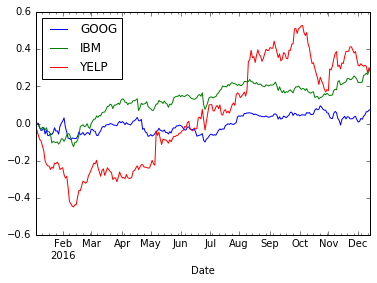

In [4]:
pan = pandas.Panel(d)
df1 = pan.minor_xs('Adj Close')
px=df1.asfreq('B',method='pad')
rets = px.pct_change()
((1+ rets).cumprod() -1).plot()

## 2) Visualisation géométrique

In [5]:
from mpl_toolkits.mplot3d import *
import matplotlib.pyplot as plt
import numpy as np
from random import random, seed
from matplotlib import cm

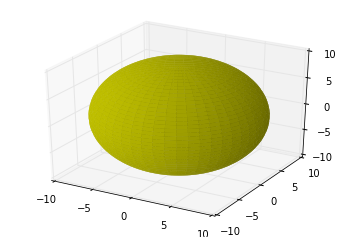

In [6]:
#%%%%%%%%% Presentation d'une bulle rouge %%%%%%%%#
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z, rstride=2, cstride=2, linewidth=0, alpha=1, color='y', antialiased=True, edgecolor=(0,0,0,0))

plt.show()


## Visualisation d'un phénomène physique

L'equation de Biot-et-Savart

In [7]:
import numpy as np

# Constantes
my0=4*np.pi*1e-7;   # perméabilité du vide 
I0=-1;              #  Amplitude du courant
                    # le courant circule de gauche à droite

# Dimensions
d=25 # Diametre de la spire (mm)
segments=100 # discretization de la spire
alpha = 2*np.pi/(segments-1) # discretization de l'angle 

# initialisarion de la spire
x=[i*0 for i in range(segments)]
y=[d/2*np.sin(i*alpha) for i in range(segments)]
z=[-d/2*np.cos(i*alpha) for i in range(segments)]



In [8]:
#Distance caracteristique, des filaments

distance_char=np.sqrt((z[2]-z[1])**2+(y[2]-y[1])**2);

In [9]:
# Definition du sens du positif du courant : gauche -> droite
# pour le calcul les longeurs sont exprimées en m

x_spire=np.array([x])*1e-3;
y_spire=np.array([y])*1e-3;
z_spire=np.array([z])*1e-3;


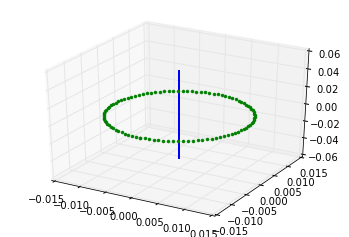

In [10]:

#%%%%%%%%%%%%%%%       Affichage de la spire    %%%%%%%%%%%%%%%%%%%%%%%%%%%#


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

plt.plot(([0,0]),([0,0]),([-0.05,0.05]),  'b-', label='ligne', linewidth=2)
plt.plot(y_spire, z_spire,  'g.', label='spire 1', linewidth=2)

plt.show()



In [11]:
#%%%%%%%%%% Calcul du champ magnetique en utilisant Biot et Savart


ndp=50 # Nombre de points

# limites x
xmin=-0.05
xmax= 0.05

# limites y
ymin=-0.05
ymax=+0.05

# limites z
zmin=-0.05
zmax=+0.05


dx=(xmax-xmin)/(ndp-1) #increment x
dy=(ymax-ymin)/(ndp-1) # increment y
dz=(zmax-zmin)/(ndp-1) # increment z



In [12]:

#%%%%%%%%%%%%%%%        Calcul magnetostatique    %%%%%%%%%%%%%%%%%%%%%%%%%%%#

bxf=np.zeros(ndp)  # initialization de la composante  Bx du champ 
byf=np.zeros(ndp)  # initialization de la composante  By du champ
bzf=np.zeros(ndp)  # initialization de la composante  Bz du champ

I0f1=my0*I0/(4*np.pi) # Magnétostatique (on multiplie le courrant 
                        #% $$ \mu_0/(4.\pi)par $$)


# Intégation du champ induit en un point de la ligne bleue
# par le courant circulant sur chanque segment de  Boucle verte


bfx=0
bfy=0
bfz=0

nseg=np.size(z_spire)-1

for i in range(ndp):
    #Initialisation des positions
    xM=(xmin+i*dx)
    yM=0
    zM=0
    #Initialisation des champs locaux   
    bfx=0
    bfy=0
    bfz=0
    
    R=np.array([xM,yM,zM])
    # vecteur position sur 
    # le point qui doit être calcul
    # en intégrant la contribution 
    # de tous les courants le long
    # de la boucle verte
    for wseg in range(nseg):
            xs=x_spire[0][wseg]
            ys=y_spire[0][wseg]
            zs=z_spire[0][wseg]
        
            Rs=np.array([xs, ys, zs])
        
            drsx=(x_spire[0][wseg+1]-x_spire[0][wseg])
            drsy=(y_spire[0][wseg+1]-y_spire[0][wseg])
            drsz=(z_spire[0][wseg+1]-z_spire[0][wseg])
    
            drs=np.array([drsx, drsy, drsz])
            #direction du courant
        
            Delta_R= Rs - R
            #vecteur entre l'élement de spire et 
            #le point où est calcul le champ
            Delta_Rdrs=sum(Delta_R * drs)
            Delta_Rdist=np.sqrt(Delta_R[0]**2+Delta_R[1]**2+Delta_R[2]**2)
        
            #Delta_Rdis2=Delta_Rdist**2
            Delta_Rdis3=Delta_Rdist**3
        
            b2=1.0/Delta_Rdis3
            b12=I0f1*b2*(-1)
        
            # Produit vectoriel
            Delta_Rxdrs_x=Delta_R[1]*drsz-Delta_R[2]*drsy
            Delta_Rxdrs_y=Delta_R[2]*drsx-Delta_R[0]*drsz
            Delta_Rxdrs_z=Delta_R[0]*drsy-Delta_R[1]*drsx
        
            #Intégration
            bfx=bfx+b12*Delta_Rxdrs_x
            bfy=bfy+b12*Delta_Rxdrs_y
            bfz=bfz+b12*Delta_Rxdrs_z
        
# Il faut utiliser un champ définit comme 3 listes :
# une liste pour chaque abscisse      
    bxf[i]+=bfx
    byf[i]+=bfy
    bzf[i]+=bfz



In [13]:

#%%%%%%%%%%%  Modèle Théorique   %%%%%%%%%%%%%%%%%%#
r=d/2;    # rayon de la spire en mm
r=r*1e-3; # rayon de la spire en m
  
bx_analytique=[abs(my0*I0)*(r)**2/(2*((r)**2+(x)**2)**(3/2)) for x in np.linspace(xmin, xmax, ndp, endpoint = True)]
  



$$B(x)=\frac{\mu_o}{4\pi}.I_o.\frac{r^2}{2 (r^2 +x^2)^{3/2} }$$

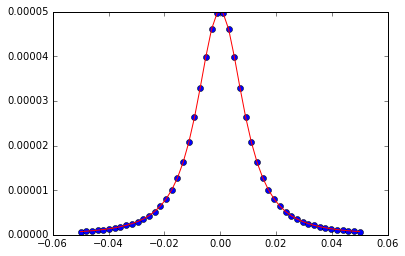

In [14]:
#%%%%%%%%%%%  Visualisation %%%%%%%%%%%%%%%%%%%%%%%#

plt.plot(np.linspace(xmin, xmax, ndp, endpoint = True) , bxf,'bo')
plt.plot(np.linspace(xmin, xmax, ndp, endpoint = True) , bx_analytique,'r-')

# Une autre manière de définir les fonctions : les Lambdas

In [15]:
def my_funct(f,arg):
    return f(arg)

my_funct(lambda x : 2*x*x,5)

50

**Lambda** est un racourci pour créer des fonctions anonymes
Elles ne sont pas plus faciles à ecrire 

In [16]:
a=(lambda x: x*x)(8)
print(a)

64


La racine d'un polynome est la valeur pour laquelle est 0 
Avec un lambda c'est plus simple : 0


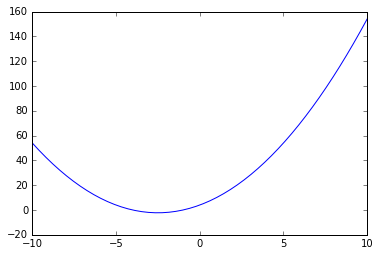

In [17]:
def polynome(x):
    return x**2 + 5*x + 4

racine=-4
print("La racine d'un polynome est la valeur pour laquelle est {0} " \
      .format(polynome(racine)))
print("Avec un lambda c'est plus simple : ",end="")
print((lambda x:x**2 + 5*x + 4)(-4))

X=np.linspace(-10,10,50,endpoint = True)
plt.plot(X,(lambda x:x**2 + 5*x + 4)(X))
plt.show()